## **Blood cell image classification for malaria detection**







In 2019, malaria caused an estimated 229 million clinical episodes,
and **409,000 deaths**.</br> 
Malaria parasites can be identified by examining under the microscope a drop of the patient’s blood. Prior to examination, the specimen is stained (most often with the Giemsa stain) to give the parasites a distinctive appearance.
which is usually repetetive and tidious task to perform.

In 2019, malaria caused an estimated 229 million clinical episodes,
and **409,000 deaths**.</br> 
Malaria parasites can be identified by examining under the microscope a drop of the patient’s blood. Prior to examination, the specimen is stained (most often with the Giemsa stain) to give the parasites a distinctive appearance.
which is usually repetetive and tidious task to perform.

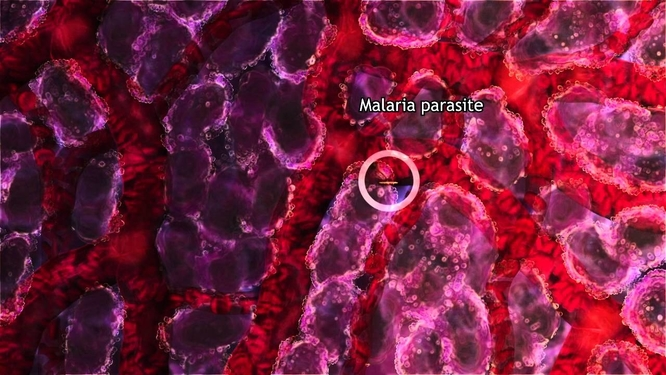

So, in this workshop we will use some "AI" magic and perform the classification of **blood cells** into **parasited** with malaria or **not infected** automatically in order to facilitate malaria diagnosis.

## **import necessary packages**


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
# useful for building neural networks then interacting with

import os
# useful for manipulating folders and files

from PIL import Image
# to manipulate images


import numpy as np
np.random.seed(1000)# for results reproduceability
# useful for manipulating matrix and multidimensional arrays

import matplotlib.pyplot as plt
# useful for plotting and showing  images

## **Loading Dataset**


In order to train our model, we will use a dataset of segmented cells from the thin blood smear slide images from the Malaria Screener research activity.</br>
Images belong to two types cells: parasited with malaria and not infected. 
This the link to the full description of the dataset and how it was collected:
https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html

In [ ]:
#we verify that our dataset is balanced
print("number of parasited cells images= ",len(os.listdir("./dataset_part1/Parasitized")))
print("number of uninfected cells images=  ",len(os.listdir("./dataset_part1/Uninfected")))

In [ ]:
image_directory = './dataset_part1/'
SIZE = 64  # our neural nets expect input data of same format so we will use resize our images to (size x size) 
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

**a) Loading Parasitized cells**

In [ ]:
parasitized_images = os.listdir(image_directory + 'Parasitized/')
uninfected_images = os.listdir(image_directory + 'Uninfected/')

if (len(parasitized_images)>0) and (len(uninfected_images)>0):
    for i, (image_name_parasited,image_name_uninfected) in enumerate(zip(parasitized_images,uninfected_images)):
        if ('.png' in image_name_parasited) and ('.png' in image_name_uninfected):
            image_parasited = Image.open(image_directory + 'Parasitized/' + image_name_parasited)
            image_uninfected = Image.open(image_directory + 'Uninfected/' + image_name_uninfected)
            image_parasited = image_parasited.resize((SIZE, SIZE))
            image_uninfected = image_uninfected.resize((SIZE, SIZE))
            dataset.append(np.array(image_parasited))
            label.append(0)
            dataset.append(np.array(image_uninfected))
            label.append(1)
        

**b) Loading Uninfected cells**

In [ ]:
#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png') and (i<1000):
        image = Image.open(image_directory + 'Uninfected/' + image_name)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


In [ ]:
# we have now two list where at index i : dataset contains the image pixel values, label contains its label (class)
plt.title("label="+str(label[0]))
plt.imshow(dataset[0])
#plt.show()


**Splitting data into training and test**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # transforms labels from a number to 1-D array of 0s and 1s 

# we will split our **dataset** and its corresponding labels to two parts:
#80% will be used to train our model, and 20% will be used to test how good our trained model is. 
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset), np.array(label), test_size = 0.20, random_state = 0)    


 # **Building the model**

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3) as all input images must have the same shape

In [ ]:
# our deep neural network contains convolutional layers, maxpooling layers
# and BatchNormalisation and dropout layers to deal with overfitting (not genralizing on unseen data )

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'softmax', units=2))
 

In [ ]:
# we compile our model 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# this is a summary of our DNN
print(model.summary())

# **Training the model**

In [ ]:
## Training the model
#Fit the model
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_split = 0.1,
                         shuffle = True
                     )


# **Testing the model**

In [ ]:
# ## Accuracy calculation
# 
# now we calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

In [ ]:
# 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")